In [1]:
#Importing the dependencies 
from census import Census

import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
#REading the csv file 
artist_df = pd.read_csv('data.csv')
artist_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


In [4]:
#General outlook 1942-1945
year1942to1945_df = artist_df.loc[(artist_df['year'] == 1942) | (artist_df['year'] == 1943) | (artist_df['year'] == 1944) | (artist_df['year'] == 1945)]

In [6]:
#count values 1942-1945
ww2_df = year1942to1945_df.groupby(['year'])['id'].count()
ww2_df

year
1942    1691
1943     714
1944     771
1945    2000
Name: id, dtype: int64

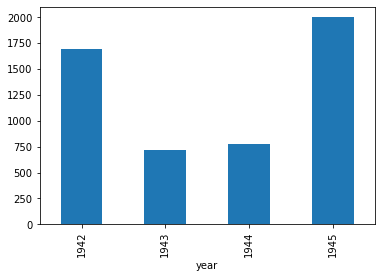

In [7]:
#General value plots
ww2_df.plot(kind='bar',x='year');

In [40]:
# Crazy idea that migt help the project
o_year1942to1945_df = artist_df.loc[(artist_df['year'] == 1942) | (artist_df['year'] == 1943) | (artist_df['year'] == 1944) | (artist_df['year'] == 1945)].sort_values(['popularity'],ascending=False)
top_year1942to1945_df = o_year1942to1945_df.head(500)
top_year1942to1945_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,5.000000e+02,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.823070,0.502090,2.351245e+05,0.254330,0.0,0.134724,5.532000,0.262762,-14.839288,0.708000,16.018000,0.195862,115.624204,0.493166,1943.940000
std,0.207023,0.177241,2.149582e+05,0.149437,0.0,0.290015,3.638055,0.203992,4.093378,0.455138,12.024261,0.316542,32.676785,0.245457,1.162369
min,0.095900,0.105000,4.613300e+04,0.006390,0.0,0.000000,0.000000,0.026100,-30.882000,0.000000,5.000000,0.025700,44.467000,0.033700,1942.000000
25%,0.788500,0.361750,1.582052e+05,0.149750,0.0,0.000000,2.000000,0.120000,-17.171750,0.000000,8.000000,0.037275,88.271000,0.282000,1943.000000
50%,0.909000,0.509000,1.808700e+05,0.244500,0.0,0.000067,6.000000,0.188000,-15.029000,1.000000,12.000000,0.048250,110.653000,0.517500,1944.000000
75%,0.972000,0.641250,2.143102e+05,0.322250,0.0,0.032125,9.000000,0.339250,-12.064250,1.000000,18.250000,0.104250,133.861750,0.683250,1945.000000
max,0.996000,0.895000,3.499774e+06,0.836000,0.0,0.969000,11.000000,0.975000,-4.703000,1.000000,80.000000,0.962000,208.202000,0.974000,1945.000000


In [62]:
#Get stats for all of the years as one
stat_df = pd.DataFrame({'Mean': top_year1942to1945_df.describe().transpose()['mean']})
drop_stat_df=stat_df.transpose()
drop_stat_df = drop_stat_df.drop(columns=['year','duration_ms'])
f_drop_stat_df=drop_stat_df.reset_index()
f_drop_stat_df

,index,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,Mean,0.82307,0.50209,0.25433,0.0,0.134724,5.532,0.262762,-14.839288,0.708,16.018,0.195862,115.624204,0.493166


In [63]:
f_drop_stat_df

,index,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,Mean,0.82307,0.50209,0.25433,0.0,0.134724,5.532,0.262762,-14.839288,0.708,16.018,0.195862,115.624204,0.493166


In [67]:
#get column names for for loop
drop_stat_column_list = f_drop_stat_df.columns[1:]
drop_stat_column_list

Index(['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

In [75]:
artist= artist_df.loc[(artist_df['year'] == 1942) | (artist_df['year'] == 1943) | (artist_df['year'] == 1944) | (artist_df['year'] == 1945)].sort_values(['popularity'],ascending=False)
top_artist = o_year1942to1945_df.head(1)
top_artist_df = top_artist.describe()
top_artist_df

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,1.000,1.000,1.0,1.000,1.0,1.000,1.0,1.000,1.000,1.0,1.0,1.0000,1.000,1.000,1.0
mean,0.673,0.317,177480.0,0.158,0.0,0.353,9.0,0.338,-16.485,1.0,80.0,0.0381,130.503,0.247,1942.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.673,0.317,177480.0,0.158,0.0,0.353,9.0,0.338,-16.485,1.0,80.0,0.0381,130.503,0.247,1942.0
25%,0.673,0.317,177480.0,0.158,0.0,0.353,9.0,0.338,-16.485,1.0,80.0,0.0381,130.503,0.247,1942.0
50%,0.673,0.317,177480.0,0.158,0.0,0.353,9.0,0.338,-16.485,1.0,80.0,0.0381,130.503,0.247,1942.0
75%,0.673,0.317,177480.0,0.158,0.0,0.353,9.0,0.338,-16.485,1.0,80.0,0.0381,130.503,0.247,1942.0
max,0.673,0.317,177480.0,0.158,0.0,0.353,9.0,0.338,-16.485,1.0,80.0,0.0381,130.503,0.247,1942.0


In [104]:
c_df = pd.DataFrame({'Mean 1942 - 1945':f_drop_stat_df.describe().transpose()['mean'],
                    'Top Song from 1942-1945': top_artist_df.describe().transpose()['mean']})
c_df_transpose = c_df.transpose().reset_index().drop(columns=['duration_ms','year'])
f_column_list = c_df_transpose.columns[1:]
f_column_list


Index(['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

In [105]:
c_df_transpose

,index,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,Mean 1942 - 1945,0.823070,0.502090,0.254330,0.000000,0.134724,5.532000,0.262762,-14.839288,0.708,16.018000,0.195862,115.624204,0.493166
1,Top Song from 1942-1945,0.719714,0.414571,0.278286,0.142857,0.445429,7.857143,0.432571,-13.987143,1.000,68.714286,0.175514,112.002571,0.354571


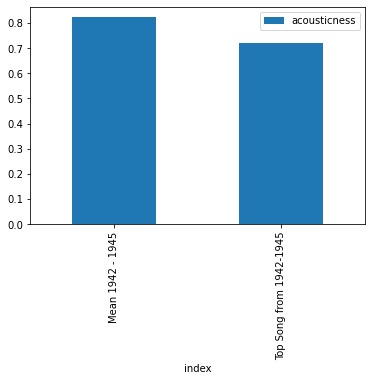

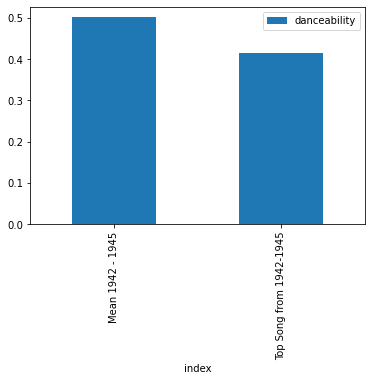

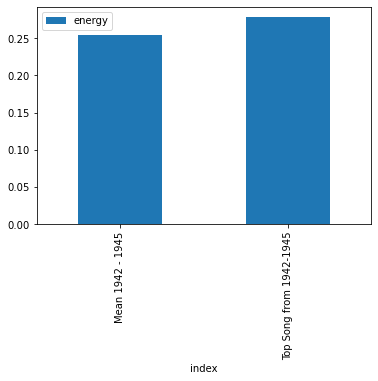

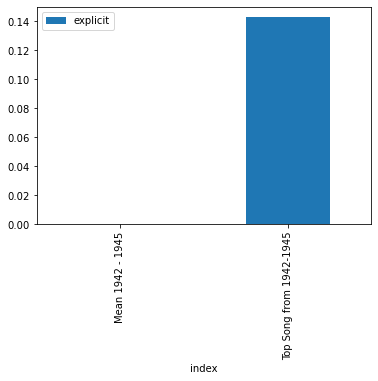

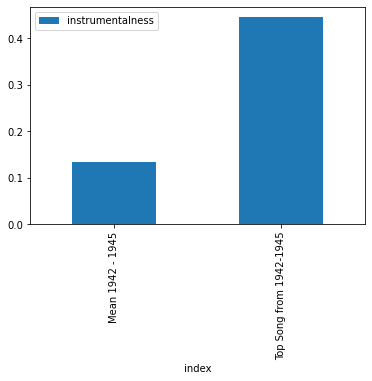

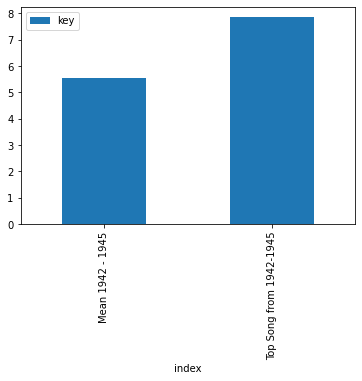

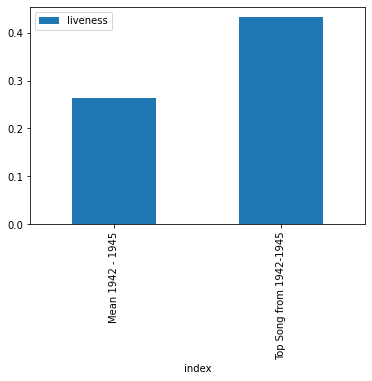

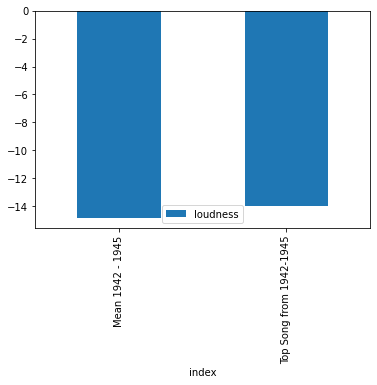

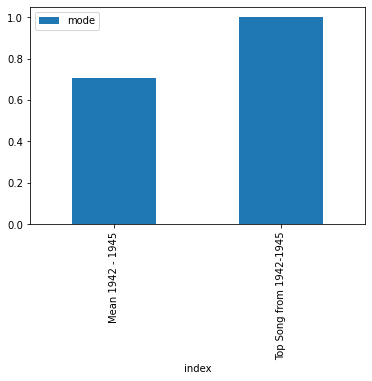

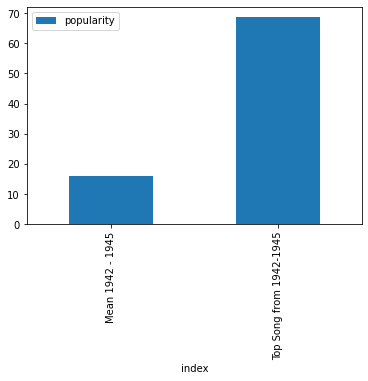

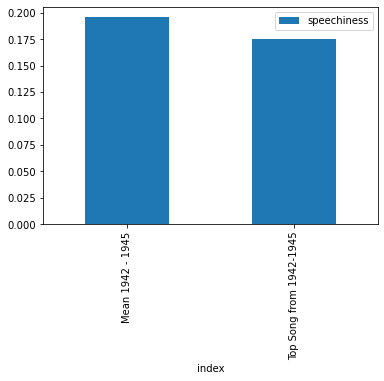

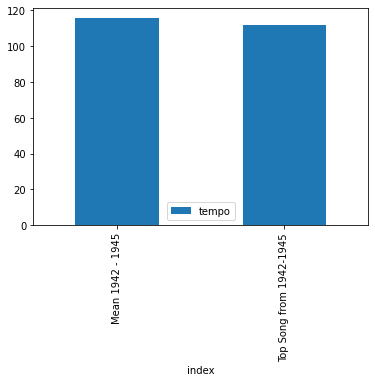

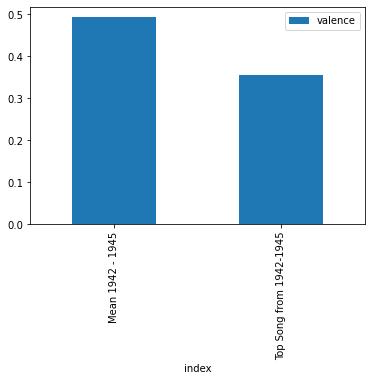

In [107]:
for i in f_column_list:
    c_df_transpose.plot(kind = 'bar', x = 'index', y = i);

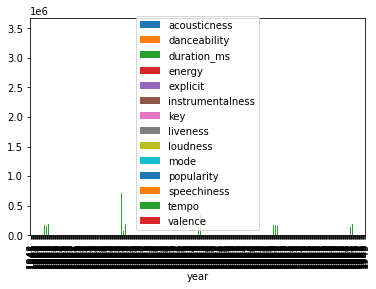

In [34]:
#top_year1942to1945_df.plot(kind='bar',x='year');

In [12]:
#Getting year by year 1942-1945 data
#Year 1945
year1945_df =  artist_df.loc[artist_df['year'] == 1945].sort_values(['popularity'],ascending=False)
year1945_top_df = year1945_df.head(500)
year1945_top_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.874571,0.474121,2.007359e+05,0.242796,0.030000,0.197825,5.098000,0.202861,-15.067254,0.764000,8.372000,0.087270,113.847904,0.480410,1945.0
std,0.184134,0.169578,1.249006e+05,0.161693,0.170758,0.330482,3.444434,0.140558,4.721493,0.425047,11.725211,0.160607,32.801412,0.261349,0.0
min,0.005280,0.070000,1.790700e+04,0.006390,0.000000,0.000000,0.000000,0.026100,-34.731000,0.000000,0.000000,0.025700,46.562000,0.033700,1945.0
25%,0.851750,0.353000,1.560065e+05,0.122500,0.000000,0.000009,2.000000,0.103000,-17.610250,1.000000,1.000000,0.036700,86.207000,0.232250,1945.0
50%,0.946500,0.483000,1.799310e+05,0.209500,0.000000,0.001320,5.000000,0.152500,-14.937000,1.000000,3.000000,0.044400,108.861500,0.515000,1945.0
75%,0.981000,0.600000,2.007405e+05,0.325500,0.000000,0.273500,8.000000,0.272250,-11.962250,1.000000,12.000000,0.060300,133.587750,0.699000,1945.0
max,0.996000,0.849000,1.297000e+06,0.834000,1.000000,0.965000,11.000000,0.975000,-4.588000,1.000000,64.000000,0.956000,202.481000,0.975000,1945.0


In [13]:
#Year 1944
year1944_df =  artist_df.loc[artist_df['year'] == 1944].sort_values(['popularity'],ascending=False)
year1944_top_df = year1944_df.head(500)
year1944_top_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,5.000000e+02,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.878807,0.504084,2.620856e+05,0.260525,0.0,0.453616,5.574000,0.240652,-15.019374,0.644000,4.518000,0.203896,106.693838,0.527940,1944.0
std,0.207819,0.161871,2.177710e+05,0.161140,0.0,0.408072,3.574083,0.191238,5.647762,0.479295,8.627778,0.308848,31.280891,0.246586,0.0
min,0.024300,0.000000,2.920000e+04,0.006450,0.0,0.000000,0.000000,0.039100,-35.112000,0.000000,0.000000,0.000000,0.000000,0.000000,1944.0
25%,0.905750,0.395500,1.675378e+05,0.143000,0.0,0.000261,2.000000,0.112000,-17.774250,0.000000,0.000000,0.042800,80.677500,0.351750,1944.0
50%,0.976000,0.510500,1.893670e+05,0.253500,0.0,0.488000,6.000000,0.162000,-14.544500,1.000000,0.000000,0.057350,103.375500,0.526500,1944.0
75%,0.992000,0.635000,2.642368e+05,0.329000,0.0,0.888000,9.000000,0.304750,-11.075750,1.000000,5.000000,0.142500,127.868250,0.731000,1944.0
max,0.996000,0.859000,2.599694e+06,1.000000,0.0,0.999000,11.000000,0.940000,1.830000,1.000000,74.000000,0.962000,209.588000,0.971000,1944.0


In [14]:
#Year 1943
year1943_df =  artist_df.loc[artist_df['year'] == 1943].sort_values(['popularity'],ascending=False)
year1943_top_df = year1943_df.head(500)
year1943_top_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,5.000000e+02,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.0
mean,0.910730,0.445538,2.423269e+05,0.284809,0.0,0.389983,5.150000,0.249538,-13.584160,0.736000,1.5340,0.106507,106.877822,0.482333,1943.0
std,0.151505,0.167934,3.118657e+05,0.175766,0.0,0.398336,3.458819,0.206909,4.515503,0.441241,4.5807,0.140416,32.348807,0.278201,0.0
min,0.000056,0.059100,2.186400e+04,0.008830,0.0,0.000000,0.000000,0.030900,-34.896000,0.000000,0.0000,0.026700,42.869000,0.030200,1943.0
25%,0.903000,0.317750,1.532972e+05,0.157750,0.0,0.000079,2.000000,0.112000,-16.125000,0.000000,0.0000,0.038700,80.811500,0.240750,1943.0
50%,0.967500,0.451000,1.857335e+05,0.240000,0.0,0.208500,5.000000,0.158500,-13.059500,1.000000,0.0000,0.051100,100.169500,0.489500,1943.0
75%,0.990000,0.563500,2.196568e+05,0.362500,0.0,0.839250,8.000000,0.309500,-10.599750,1.000000,1.0000,0.102250,126.573750,0.730750,1943.0
max,0.996000,0.846000,3.499774e+06,0.961000,0.0,0.993000,11.000000,0.977000,-4.083000,1.000000,55.0000,0.892000,215.771000,0.970000,1943.0


In [16]:
#Year 1942
year1942_df =  artist_df.loc[artist_df['year'] == 1942].sort_values(['popularity'],ascending=False)
year1942_top_df = year1942_df.head(500)
year1942_top_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,5.000000e+02,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.882195,0.471192,2.069607e+05,0.266185,0.0,0.365597,5.388000,0.228553,-14.893590,0.746000,3.830000,0.081082,108.572476,0.503976,1942.0
std,0.205477,0.158973,1.316425e+05,0.178371,0.0,0.406568,3.414201,0.174118,5.302762,0.435734,8.141601,0.105262,31.595798,0.262889,0.0
min,0.002390,0.085900,1.665300e+04,0.005810,0.0,0.000000,0.000000,0.029900,-36.109000,0.000000,0.000000,0.025300,35.734000,0.000000,1942.0
25%,0.878000,0.349250,1.507518e+05,0.136750,0.0,0.000050,2.000000,0.112000,-18.108000,0.000000,0.000000,0.037075,82.511250,0.274000,1942.0
50%,0.972500,0.461000,1.792360e+05,0.232500,0.0,0.086500,6.000000,0.159000,-14.088500,1.000000,1.000000,0.043850,104.889500,0.510500,1942.0
75%,0.991000,0.588500,2.100485e+05,0.356250,0.0,0.862000,8.000000,0.303000,-11.009250,1.000000,3.000000,0.064850,128.456500,0.717250,1942.0
max,0.996000,0.895000,1.204800e+06,0.994000,0.0,0.989000,11.000000,0.921000,-5.133000,1.000000,80.000000,0.940000,208.202000,0.974000,1942.0


In [18]:
#Combine the data for WW2 US involement (1942-1945)
ww2_combined_df = pd.DataFrame({
    'Year 1942':year1942_top_df.describe().transpose()['mean'],
    'Year 1943':year1943_top_df.describe().transpose()['mean'],
    'Year 1944':year1944_top_df.describe().transpose()['mean'],
    'Year 1945':year1945_top_df.describe().transpose()['mean'], 
})
#Transpose the df 
transposed_combined_ww2_df = ww2_combined_df.transpose().reset_index().sort_values('index')
transposed_combined_ww2_df

,index,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,Year 1942,0.882195,0.471192,206960.658,0.266185,0.00,0.365597,5.388,0.228553,-14.893590,0.746,3.830,0.081082,108.572476,0.503976,1942.0
1,Year 1943,0.910730,0.445538,242326.894,0.284809,0.00,0.389983,5.150,0.249538,-13.584160,0.736,1.534,0.106507,106.877822,0.482333,1943.0
2,Year 1944,0.878807,0.504084,262085.612,0.260525,0.00,0.453616,5.574,0.240652,-15.019374,0.644,4.518,0.203896,106.693838,0.527940,1944.0
3,Year 1945,0.874571,0.474121,200735.904,0.242796,0.03,0.197825,5.098,0.202861,-15.067254,0.764,8.372,0.087270,113.847904,0.480410,1945.0


In [25]:
column_list = transposed_combined_ww2_df.columns[1:]
column_list

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')

In [30]:
#Creating lineplot per year comparing the variables
#transposed_combined_ww2_df.plot(kind='line', x = 'index', y = ['acousticness'])
                                #column_list)
   # 'acousticness','instrumentalness','danceability','duration_ms','energy','explicit',''])

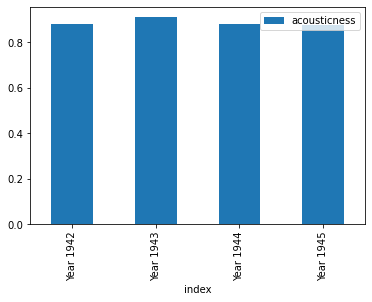

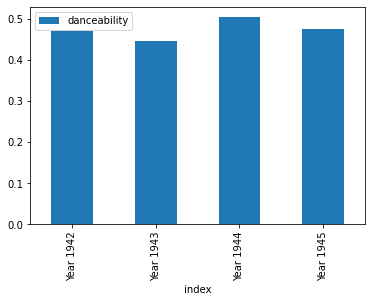

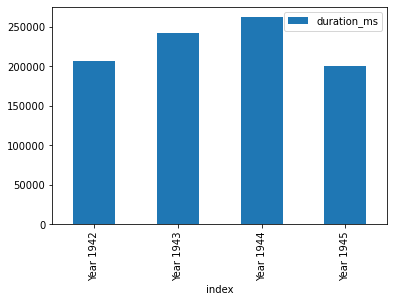

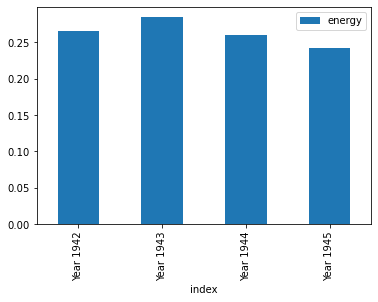

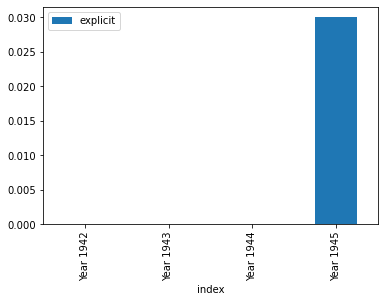

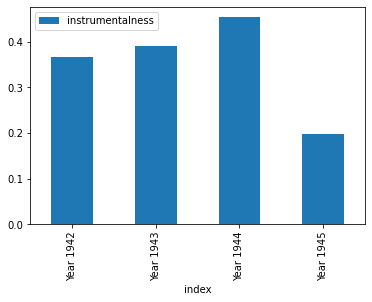

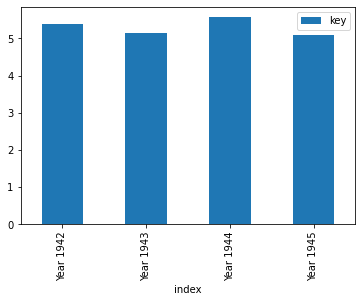

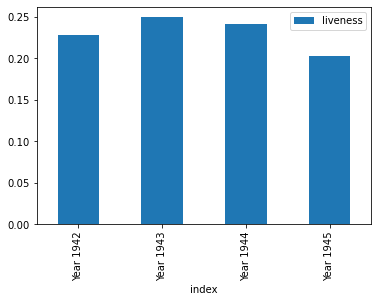

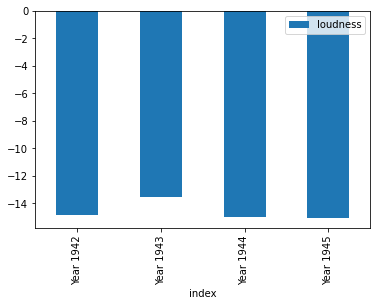

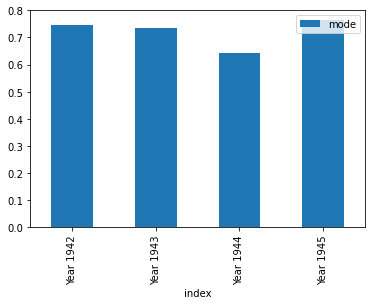

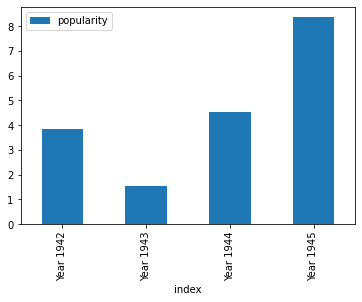

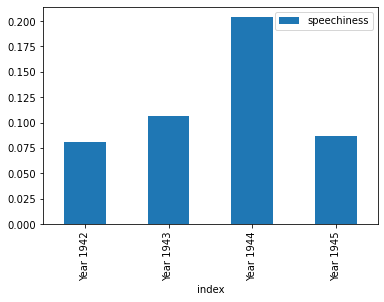

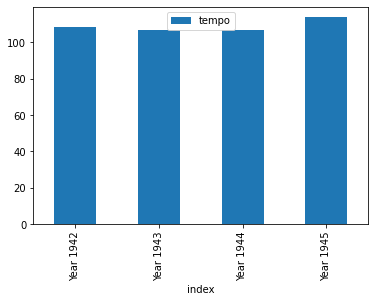

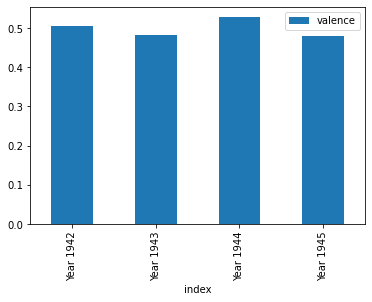

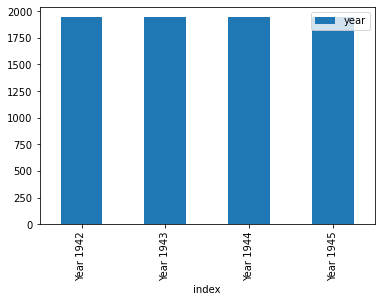

In [32]:
#Creating for loop to  get bargraphs for each column per year to analyze
for i in column_list:
    transposed_combined_ww2_df.plot(kind = 'bar', x = 'index', y = i);